<a href="https://colab.research.google.com/github/GrigoreGeorgeAlexandru/Colab-projects/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema blocuri

Avem un număr N de blocuri(cuburi) dispuse pe S stive. Stivele pot fi goale sau pot avea o parte din cuburi puse unul peste altul.

Se dă o stare initială, cu blocurile așezate, într-o anumită configurație, de exemplu:

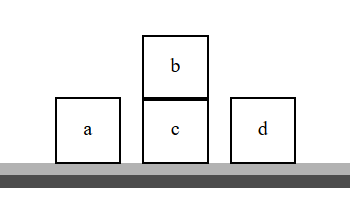

și una sau mai multe stări finale, cu blocurile rearanjate, de exemplu:

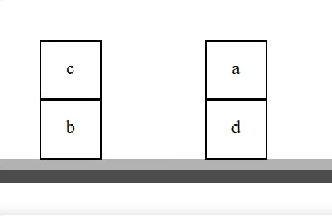

Se cere secvența de mutări necesare pentru a ajunge din starea inițială în starea finală. În cadrul unei mutări putem lua orice cub aflat în vârful unei stive și îl putem pune în vârful oricărei alte stive.

# Soluții

## 1. Pregătirea claselor
---

Preluați clasele Graph, Node și State implementate pentru algoritmul A* și actualizați-le pentru problema blocurilor.

Aveți grijă la funcțiile de afișare, calculul succesorilor și calculul estimării* pe nod!

Creați două obiecte de tip Node cu informații diferite și afișati succesorii pentru ele, verificând corectitudinea informațiilor.

_* Momentan estimarea poate fi banală_.

In [ ]:
import copy


class State:
  S = 0
  C = []

  def __init__(self, stive):
    ''' Constructorul clasei State

    :param stive: lista stivelor, unde elementul de pe prima pozitie
    reprezinta cubul de la baza stivei, iar ultima pozitie cubul din varf

    Exemplu configuratie:
    [
      [cub1],
      [cub2, cub4],
      []
      [cub3]
    ]
    '''
    self.stive = stive

  def __hash__(self):
    return id(self)

  def __eq__(self, cls):
     return self.stive == cls.stive

  def __str__(self):
    afis = 'Stare curenta:\n'

    # Afisare pe verticala:
    x = max([len(stiva) for stiva in self.stive])
    while x >= 0:
      afis += ' '.join([str(stiva[x]) if len(stiva) > x else '.'
                        for stiva in self.stive]) + '\n'
      x -= 1

    # Afisare pe orizontala:
    # for stiva in self.stive:
    #   afis += ' '.join([str(cub) for cub in stiva]) + '\n'

    return afis

  def __repr__(self):
    return str(self) + '\n'

  def succesori(self):
    ''' Calculeaza lista succesorilor directi ai starii curente.

    :return: lista starilor admisibile
    '''
    succesori = []

    for i, stiva in enumerate(self.stive):
      # Verific ca stiva din care vreau sa iau un cub nu este vida
      if len(stiva) == 0:
        continue

      for j in range(len(self.stive)):
        # Verific sa nu ma aflu pe stiva de pe care am luat cubul
        if i == j:
          continue

        # Creez o noua lista de stive cu aceeasi informatie ca lista curenta
        stiveCurente = copy.deepcopy(self.stive)

        # Scot ultimul element din stiva i si il adaug la finalul stivei j
        stiveCurente[j].append(stiveCurente[i].pop(-1))

        # Adaug noua stare in lista de succesori
        succesori.append(State(stiveCurente))

    return succesori

In [ ]:
class Node:
  def __init__(self, informatie, parinte = None, g = 0, h = 0):
    ''' Constructorul clasei Node.

    :param informatie: informatia nodului curent
    :param parinte: pointer catre parintele nodului curent
    :param succesori: lista succesorilor nodului curent
    :param g: lungimea drumului de la nodul start pana la nodul curent
    :param h: estimarea distantei de la nodul curent pana la cel mai apropiat
    nod scop
    '''
    self.informatie = informatie
    self.parinte = parinte
    self.g = g
    self.h = h
    self.f = g + h
    self.succesori = []

  def __str__(self):
    return str(self.informatie)

  def __repr__(self):
    return str(self) + \
    ' (' + ' -> '.join([str(x) for x in self.drumRadacina()]) + ')'

  def __eq__(self, cls):
    return self.f == cls.f and self.g == cls.g

  def __lt__(self, cls):
    return self.f < cls.f or (self.f == cls.f and self.g > cls.g)

  def __le__(self, cls):
    return self < cls or self == cls

  def vizitat(self):
    ''' Returneaza True daca nodul curent a fost deja vizitat, False altfel '''
    return len([1 for nod in self.drumRadacina()
    if nod.informatie == self.informatie]) > 1 or \
    self.informatie in [nod.informatie for nod in self.parinte.succesori]

  def drumRadacina(self):
    ''' Calculeaza lista nodurilor de la radacina pana la nodul curent. '''
    if self.parinte is None:
      return [self]
    return self.parinte.drumRadacina() + [self]

  def printDrumRadacina(self):
    ''' Returneaza un string cu formatarea drumului de la radacina pana la nodul
    curent.
    '''
    drum = self.drumRadacina()
    afisare = str(drum[0])

    for i in range(1, len(drum)):
      state = drum[i - 1].informatie.stive
      stateCurent = drum[i].informatie

      for j in range(State.S):
        for h in range(len(state[j])):
          if h >= len(stateCurent.stive[j]) or state[j][h] != stateCurent.stive[j][h]:
            cubMutat = state[j][h]
            break

      afisare += f"Mutam cubul {cubMutat}:\n" + str(stateCurent)

    return afisare

In [ ]:
nod1 = Node(State([['a'], ['c', 'b'], ['d']]))
nod2 = Node(State([['b', 'c'], [], ['d', 'a']]))

print("Nod 1:")
print(nod1)
print(nod1.informatie.succesori())

print("Nod 2:")
print(nod2)
print(nod2.informatie.succesori())

Nod 1:
Stare curenta:
. . .
. b .
a c d

[Stare curenta:
. . .
. a .
. b .
. c d

, Stare curenta:
. . .
. b a
. c d

, Stare curenta:
. . .
b . .
a c d

, Stare curenta:
. . .
. . b
a c d

, Stare curenta:
. . .
d b .
a c .

, Stare curenta:
. . .
. d .
. b .
a c .

]
Nod 2:
Stare curenta:
. . .
c . a
b . d

[Stare curenta:
. . .
. . a
b c d

, Stare curenta:
. . .
. . c
. . a
b . d

, Stare curenta:
. . .
a . .
c . .
b . d

, Stare curenta:
. . .
c . .
b a d

]


## 2. Validări și afișări
---

a) Se vor citi dintr-un fișier starea inițială și stările finale. Actualizați clasele folosind această informație.

Exemplu fișier input cu o stare inițială (până la ```---```) și 2 stări finale:
```
a
c b
d
---
b c
.
d a
---
.
.
d b c a
```

b) Adăugați în clasa Graph o metodă *valideaza* care verifică dacă fișierul dat e valid (toate stările finale au același număr de stive și aceleași blocuri ca și starea inițială).

In [ ]:
class Graph:
  EURISTICA="banala"

  def __init__(self, file="input.txt"):
    ''' Constructorul clasei Graph.

    :param file: calea fisierului care contine informatiile nodurilor
    '''
    nodStart, noduriScop = self.citeste_stari(file)

    self.nodStart = Node(State(nodStart))
    self.noduriScop = noduriScop

    State.S = len(nodStart)
    State.C = [cub for stiva in nodStart for cub in stiva]
    State.C.sort()

    if not self.valideaza():
      print("Informatiile din fisierul dat nu sunt valide")

  def citeste_stari(self, file):
    ''' Citeste din fisier starea initiala si starile finale.

    :param file: calea fisierului care contine informatiile nodurilor
    :return: returneaza informatia din nodul start, informatia nodului scop
    '''
    f = open(file, "r")

    nodStart = []
    noduriScop = []
    noduriCitite = 0

    linie = f.readline()
    while linie:
      if linie == '---\n':
        noduriCitite += 1
        if noduriCitite > 1:
          noduriScop.append(nodScop)
        nodScop = []

      elif noduriCitite == 0:
        nodStart.append(linie.split())

      else:
        nodScop.append(linie.split())

      linie = f.readline()

    noduriScop.append(nodScop)
    f.close()

    return nodStart, noduriScop

  def valideaza(self):
    ''' Valideaza corectitudinea datelor de intrare (minim un nod scop, toate
    starile finale au acelasi numar de stive si aceleasi blocuri ca starea
    initiala).

    :return: True daca este valid, False altfel
    '''
    if len(self.noduriScop) == 0:
      return False

    for nodScop in self.noduriScop:
      if len(nodScop) != State.S:
        return False

      cuburi = [cub for stiva in nodScop for cub in stiva]
      cuburi.sort()
      if cuburi != State.C:
        return False

    return True

  def calcul_mutari(self, nod, nodScop):
    ''' Calculeaza cate blocuri nu sunt la locul lor fata de o stare scop.

    :return: numarul minim necesar de mutari pentru a ajunge intr-o stare scop
    '''
    diff = 0
    for i in State.S:
      n = len(nod.stive[i])
      m = len(nodScop.stive[i])
      diff += abs(n - m)

      for j in range(min(n, m)):
        diff += nod.stive[i][j] != nodScop.stive[i][j]

    return diff / 2

  def calcul_cost(self, nod, nodScop):
    ''' Calculeaza costul de mutare al blocurilor care nu sunt la locul lor
    fata de o stare scop.

    Calculez costul total din care scad costul blocurilor care se afla deja pe
    pozitia corecta.

    :return: costul minim necesar pentru a ajunge intr-o stare scop
    '''
    diff = sum([ord(nod) - ord('a') + 1 for nod in State.C])

    for i in State.S:
      n = len(nod.stive[i])
      m = len(nodScop.stive[i])

      for j in range(min(n, m)):
        if nod.stive[i][j] == nodScop.stive[i][j]:
          diff -= (ord(nod.stive[i][j]) - ord('a') + 1)

    return diff

  def estimeaza_h(self, nod):
    ''' Returneaza estimarea corespunzatoare nodului curent pe baza problemei.

    :param nod: informatia nodului pentru care vrem estimarea
    :return: estimarea pe nod
    '''
    if self.EURISTICA == "banala":
      return 0 if nod.stive in self.noduriScop else 1

    elif self.EURISTICA == "mutari":
      nrBlocuri = len(State.C)

      for nodScop in self.noduriScop:
        nrBlocuri = min(nrBlocuri, self.calcul_mutari(nod, nodScop))

      return nrBlocuri

    elif self.EURISTICA == "cost":
      nrBlocuri = len(State.C)

      for nodScop in self.noduriScop:
        nrBlocuri = min(nrBlocuri, self.calcul_cost(nod, nodScop))

      return nrBlocuri

    else:
      return len(State.C)

  def scop(self, nod):
    ''' Primeste un nod oarecare si verifica daca e scop.

    :param nod: un nod oarecare
    :return: True daca nodul e scop, False altfel
    '''
    return nod.informatie.stive in self.noduriScop

  def succesori(self, nod):
    ''' Primeste un nod al arborelui de parcurgere si returnează lista
    succesorilor directi ai nodului care nu au fost vizitati pe ramura curenta.

    :param nod: un nod oarecare
    :return: lista succesorilor nodului
    '''
    succesori = nod.informatie.succesori()
    for nod2 in succesori:
      cost = 1

      nodCurent = Node(nod2, nod, nod.g + cost, self.estimeaza_h(nod2))
      if nodCurent.vizitat():
        continue

      nod.succesori.append(nodCurent)

    return nod.succesori

In [ ]:
graf = Graph()

c) Rulați cu BF/DF problema și verificați soluțiile din output.

In [ ]:
def bfs(graf):
  ''' Implementarea tehnicii de cautare in latime (BFS) cu 1 solutie.

  :param graf: graful pe care rulam algoritmul
  :return: primele n solutii identificate
  '''
  coada = [graf.nodStart]
  while len(coada) > 0:
    nodCurent = coada.pop(0)

    if graf.scop(nodCurent):
      return nodCurent

    succesori = graf.succesori(nodCurent)
    coada += copy.deepcopy(succesori)

  return None

In [ ]:
import time

start_time = time.time()
graf = Graph()
nodFinal = bfs(graf)
end_time = time.time()

drum = nodFinal.printDrumRadacina()
f = open("outputBFS.txt", "w")

if drum:
  f.write(drum)
else:
  f.write("Nu exista solutie.")

f.write(f"\nTimpul de rulare: {end_time - start_time} secunde.")
f.close()

## 3. Euristici
---

Modificați funcția estimeaza_h astfel încât să implementeze una dintre următoare euristici în funcție de o valoare dată ca parametru:
- _banala_ - va returna costul minim pe o mutare daca starea nu e scop și 0 dacă e scop
- _euristica mutari_ - va returna un număr de mutări (mai mic sau egal decăt numărul real de mutări astfel încât să ajungem de la starea curentă la cea mai apropiată stare scop) și 0 dacă starea curentă e scop. Un astfel de număr de mutări e dat de nb = "câte blocuri nu sunt la locul lor față de fiecare stare scop" și apoi luând minimul dintre aceste valori nb.
- _euristica costuri_ - va returna un cost mai mic sau egal decât costul real al oricărui drum de la nodul curent la orice nod scop, folosindu-se în formulă și de costul de mutare al unui bloc (considerăm costul de mutare echivalent identificatorului să numeric, ex: 1 -> 1, a -> a etc.). Veți verifica care sunt blocurile care nu sunt la locul lor și veți calcula suma costurilor lor de mutare. Pentru fiecare scop se va calcula o astfel de sumă din care returnăm minimul.
- _euristica neadmisibila_ - va returna valori astfel încât estimarea pentru nod să fie neadmisibilă.

## 4. Blocuri cu A*
---

Rezolvați problema blocurilor cu A\*. Afișați într-un fișier cu calea citită de la tastatură drumul de la nodul start la nodul scop, lungimea drumului si costul total. La fel ca mai sus, considerăm că mutarea unui bloc are cost echivalentul identificatorului său numeric.

In [ ]:
import heapq

def aStar(graf):
  open = [graf.nodStart]
  closed = {}

  while open:
    nodCurent = open.pop(0)
    closed[nodCurent.informatie] = nodCurent

    if graf.scop(nodCurent):
      return nodCurent

    succesori = graf.succesori(nodCurent)

    for succesor in succesori:
      nodNou = None

      nodVechi = [nod for nod in open if succesor.informatie == nod.informatie]

      nodVechi2 = None
      if succesor.informatie in closed.keys():
        nodVechi2 = closed[succesor.informatie]

      if nodVechi:
        if succesor < nodVechi[0]:
          open.remove(nodVechi[0])
          nodNou = succesor

      elif nodVechi2:
        if succesor < nodVechi2:
          closed.pop(succesor.informatie)
          nodNou = succesor

      else:
        nodNou = succesor

      if nodNou:
        heapq.heappush(open, nodNou)

In [ ]:
import time

start_time = time.time()
graf = Graph()
nodFinal = aStar(graf)
end_time = time.time()

drum = nodFinal.printDrumRadacina()
f = open(input("Numele fisierului de iesire: "), "w")

if drum:
  f.write(drum)
  f.write(f"Lungimea drumului: {nodFinal.f}")
else:
  f.write("Nu exista solutie.")

f.write(f"\nTimpul de rulare: {end_time - start_time} secunde.")
f.close()

Numele fisierului de iesire: outputAStar.txt


## 5. Problemă alternativă
---

Să se modifice problema blocurilor cu următoarele cerințe:
- Considerăm că informația unui bloc nu este unică. Nu putem pune un bloc pe o stivă dacă mai există în stivă un bloc cu aceeași informație.
- Costul unei mutări este dat de înălțimea la care mutăm blocul (înălțimea unui bloc la baza stivei se consideră 1 și crește cu fiecare nivel).
- Considerăm că o stare este scop dacă toate stivele din ea sunt de înălțimi egale (indiferent ce avem pe stive). ATENȚIE! Nu veți enumera toate stările scop ci veți verifica dacă o stare curentă îndeplinește condiția dată (nu mai avem lista de scopuri).
- Se va implemeta și o funcție care verifică dacă din starea inițială e posibil să ajungem la o stare finală. Modificați funcția de succesori, de testare a scopului și de calculare a estimarii în mod corespunzător pentru noul criteriu de stare finală.
